In [ ]:
# Import libraries

import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical visualization

In [ ]:
data = pd.read_csv("/Loan_Modelling.csv")  # Adjust the path
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# Create a copy of the DataFrame
df = data.copy()

In [ ]:
# Display the first five rows of the DataFrame
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# Get the number of rows and columns in the DataFrame
df.shape

(5000, 14)

The dataset has 5000 rows and 14 columns

In [ ]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- 'CCAvg' variable is of type float. Rest all are of the type integer.
- Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard: These variables can be treated as binary numerical(discrete) variables.
- Education is a ordinal numerical categorical variable.
- ZipCode is a nominal numerical categorical variable.

In [ ]:
# Get summary statistics of the DataFrame and transpose the result
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

- Experience has negative value(s). This has to be corrected.

In [ ]:
# Count the number of missing values in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

In [ ]:
# Filter rows where the 'Experience' column has negative values
df[df['Experience'] < 0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4   2.30          3   
226    227   24          -1      39    94085       2   1.70          2   
315    316   24          -2      51    90630       3   0.30          3   
451    452   28          -2      48    94132       2   1.75          3   
524    525   24          -1      75    93014       4   0.20          1   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
583    584   24          -1      38    95045       2   1.70          2   
597    598   24          -2     125    92835       2   7.20          1   
649    650   25          -1      82    92677       4   2.10          3   
670    671   23          -1      61    92374       4   2.60          1   
686    687   24          -1      38    92612       4   0.60          2   
793    794   24          -2     150    94720       2   2.00          1   
889    890   24          -2      82    91103       2   1.60          3   
909    910   23          -1     149    91709       1   6.33          1   
1173  1174   24          -1      35    94305       2   1.70          2   
1428  1429   25          -1      21    94583       4   0.40          1   
1522  1523   25          -1     101    94720       4   2.30          3   
1905  1906   25          -1     112    92507       2   2.00          1   
2102  2103   25          -1      81    92647       2   1.60          3   
2430  2431   23          -1      73    92120       4   2.60          1   
2466  2467   24          -2      80    94105       2   1.60          3   
2545  2546   25          -1      39    94720       3   2.40          2   
2618  2619   23          -3      55    92704       3   2.40          2   
2717  2718   23          -2      45    95422       4   0.60          2   
2848  2849   24          -1      78    94720       2   1.80          2   
2876  2877   24          -2      80    91107       2   1.60          3   
2962  2963   23          -2      81    91711       2   1.80          2   
2980  2981   25          -1      53    94305       3   2.40          2   
3076  3077   29          -1      62    92672       2   1.75          3   
3130  3131   23          -2      82    92152       2   1.80          2   
3157  3158   23          -1      13    94720       4   1.00          1   
3279  3280   26          -1      44    94901       1   2.00          2   
3284  3285   25          -1     101    95819       4   2.10          3   
3292  3293   25          -1      13    95616       4   0.40          1   
3394  3395   25          -1     113    90089       4   2.10          3   
3425  3426   23          -1      12    91605       4   1.00          1   
3626  3627   24          -3      28    90089       4   1.00          3   
3796  3797   24          -2      50    94920       3   2.40          2   
3824  3825   23          -1      12    95064       4   1.00          1   
3887  3888   24          -2     118    92634       2   7.20          1   
3946  3947   25          -1      40    93117       3   2.40          2   
4015  4016   25          -1     139    93106       2   2.00          1   
4088  4089   29          -1      71    94801       2   1.75          3   
4116  4117   24          -2     135    90065       2   7.20          1   
4285  4286   23          -3     149    93555       2   7.20          1   
4411  4412   23          -2      75    90291       2   1.80          2   
4481  4482   25          -2      35    95045       4   1.00          3   
4514  4515   24          -3      41    91768       4   1.00          3   
4582  4583   25          -1      69    92691       3   0.30          3   
4957  4958   29          -1      50    95842       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
89          

- The Experience is negatvie mostly for the Age range 23-25. Only few values entries with age above 25 have negative experience.

In [ ]:
# Filter rows where the 'Age' column is equal to 23
df[df['Age'] == 23]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
670    671   23          -1      61    92374       4   2.60          1   
909    910   23          -1     149    91709       1   6.33          1   
2430  2431   23          -1      73    92120       4   2.60          1   
2618  2619   23          -3      55    92704       3   2.40          2   
2717  2718   23          -2      45    95422       4   0.60          2   
2962  2963   23          -2      81    91711       2   1.80          2   
3130  3131   23          -2      82    92152       2   1.80          2   
3157  3158   23          -1      13    94720       4   1.00          1   
3425  3426   23          -1      12    91605       4   1.00          1   
3824  3825   23          -1      12    95064       4   1.00          1   
4285  4286   23          -3     149    93555       2   7.20          1   
4411  4412   23          -2      75    90291       2   1.80          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
670        239              0                   0           0       1   
909        305              0                   0           0       0   
2430         0              0                   0           0       1   
2618       145              0                   0           0       1   
2717         0              0                   0           0       1   
2962         0              0                   0           0       0   
3130         0              0                   1           0       0   
3157        84              0                   0           0       1   
3425        90              0                   0           0       1   
3824         0              0                   1           0       0   
4285         0              0                   0           0       1   
4411         0              0                   0           0       1   

      CreditCard  
670            0  
909            1  
2430           0  
2618           0  
2717           1  
2962           0  
3130           1  
3157           0  
3425           0  
3824           1  
4285           0  
4411           1

- There are no rows where the age is 23 and the Experience is a positive number.

In [ ]:
# Filter rows where the 'Age' column is equal to 24
df[df['Age'] == 24]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
105    106   24           0      35    94704       3    0.1          2   
155    156   24           0      60    94596       4    1.6          1   
182    183   24           0     135    95133       1    1.5          1   
226    227   24          -1      39    94085       2    1.7          2   
315    316   24          -2      51    90630       3    0.3          3   
524    525   24          -1      75    93014       4    0.2          1   
583    584   24          -1      38    95045       2    1.7          2   
597    598   24          -2     125    92835       2    7.2          1   
686    687   24          -1      38    92612       4    0.6          2   
793    794   24          -2     150    94720       2    2.0          1   
873    874   24           0      88    90740       3    0.8          1   
889    890   24          -2      82    91103       2    1.6          3   
1173  1174   24          -1      35    94305       2    1.7          2   
2259  2260   24           0      82    90401       3    0.8          1   
2466  2467   24          -2      80    94105       2    1.6          3   
2652  2653   24           0      44    90089       4    1.6          1   
2848  2849   24          -1      78    94720       2    1.8          2   
2876  2877   24          -2      80    91107       2    1.6          3   
3626  3627   24          -3      28    90089       4    1.0          3   
3796  3797   24          -2      50    94920       3    2.4          2   
3887  3888   24          -2     118    92634       2    7.2          1   
3908  3909   24           0      44    90638       3    0.1          2   
3982  3983   24           0     119    94566       1    1.5          1   
4116  4117   24          -2     135    90065       2    7.2          1   
4393  4394   24           0      59    95521       4    1.6          1   
4514  4515   24          -3      41    91768       4    1.0          3   
4566  4567   24           0     131    92831       1    5.4          1   
4989  4990   24           0      38    93555       1    1.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
105          0              0                   1           0       1   
155          0              0                   0           0       1   
182          0              0                   0           0       1   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
524          0              0                   0           0       1   
583          0              0                   0           0       1   
597          0              0                   1           0       0   
686          0              0                   0           0       1   
793          0              0                   0           0       1   
873        134              0                   0           0       0   
889          0              0                   0           0       1   
1173         0              0                   0           0       0   
2259         0              0                   0           0       1   
2466         0              0                   0           0       1   
2652       180              0                   0           0       1   
2848         0              0                   0           0       0   
2876       238              0                   0           0       0   
3626         0              0                   0           0       0   
3796         0              0                   1           0       0   
3887         0              0                   1           0       1   
3908         0              0                   0           0       0   
3982         0              0                   0           0       1   
4116         0              0                   0           0       1   
4393         0              0       

- There are no rows where the age is 24 and the Experience is a positive number.

In [ ]:
# Filter rows where the 'Age' column is equal to 25
df[df['Age'] == 25]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4   1.60          1   
89      90   25          -1     113    94303       4   2.30          3   
143    144   25           1      54    94117       4   1.60          1   
166    167   25           1      21    95827       3   1.00          2   
347    348   25           0      43    94305       2   1.60          3   
363    364   25           0      30    92691       2   1.70          2   
379    380   25           0      28    92093       2   1.70          2   
466    467   25           0      13    91342       2   0.90          3   
484    485   25           1     113    95023       2   0.20          1   
495    496   25           0      44    94545       4   0.60          2   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
649    650   25          -1      82    92677       4   2.10          3   
1003  1004   25           1      62    94720       4   0.00          1   
1065  1066   25           1     113    90401       3   2.50          1   
1092  1093   25           1      70    92120       4   2.60          1   
1181  1182   25           0      65    90095       4   0.20          1   
1428  1429   25          -1      21    94583       4   0.40          1   
1522  1523   25          -1     101    94720       4   2.30          3   
1732  1733   25           0      88    94566       2   1.80          2   
1847  1848   25           0      52    95126       3   2.60          3   
1868  1869   25           1     118    92833       1   5.40          1   
1905  1906   25          -1     112    92507       2   2.00          1   
2009  2010   25           0      99    92735       1   1.90          1   
2102  2103   25          -1      81    92647       2   1.60          3   
2157  2158   25           0      71    93727       4   0.20          1   
2192  2193   25           1      13    95814       4   1.00          1   
2226  2227   25           1      98    90717       1   5.40          1   
2417  2418   25           0      53    90095       2   1.60          3   
2446  2447   25           1      70    93010       4   2.60          1   
2452  2453   25           1      28    94596       1   1.00          3   
2545  2546   25          -1      39    94720       3   2.40          2   
2836  2837   25           1      74    94085       4   2.60          1   
2980  2981   25          -1      53    94305       3   2.40          2   
3010  3011   25           1      72    94301       3   0.80          1   
3135  3136   25           0      91    95039       2   1.80          2   
3284  3285   25          -1     101    95819       4   2.10          3   
3292  3293   25          -1      13    95616       4   0.40          1   
3378  3379   25           0      44    94536       4   0.60          2   
3394  3395   25          -1     113    90089       4   2.10          3   
3486  3487   25           1      20    92806       4   1.00          1   
3870  3871   25           0      25    94596       2   0.90          3   
3946  3947   25          -1      40    93117       3   2.40          2   
4015  4016   25          -1     139    93106       2   2.00          1   
4046  4047   25           0      72    94303       3   2.60          3   
4271  4272   25           1     150    92507       1   6.33          1   
4481  4482   25          -2      35    95045       4   1.00          3   
4582  4583   25          -1      69    92691       3   0.30          3   
4677  4678   25           0      38    93407       2   1.60          3   
4712  4713   25           0      14    94309       2   0.90          3   
4713  4714   25           1     122    93022       2   0.20          1   
4888  4889   25           1     121    93106       1   5.40          1   

      Mortg

- People with age 25 have a maximum Experience of 1 and there are many rows with 0 experience.

In [ ]:
# Get the minimum age of individuals with 1 year of experience
df[df['Experience'] == 1]['Age'].min()

25

- The minimum age for 1 year of experience is 25

In [ ]:
# Count the occurrences of each age for individuals with 0 years of experience
df[df['Experience'] == 0]['Age'].value_counts()

Age
26    28
25    17
24    11
27     8
29     1
30     1
Name: count, dtype: int64

- Mostly, people in the age range 24-27 have no experience.

- From the above analysis, we can assume that the negative values for Experience are data entry errors and can be replaced with 0.

In [ ]:
# replace the negative values in the Experience column with 0
df.loc[df['Experience'] < 0, 'Experience'] = 0

In [ ]:
# Filter rows where the 'Experience' column has negative values
df[df['Experience'] < 0]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

- There are no negatives values in the Experience column
  

### We will use Decision Tree to build our model which predicts the acceptance of the personal loan

## Univariate Analysis

In [ ]:
# List of numerical variables
num_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

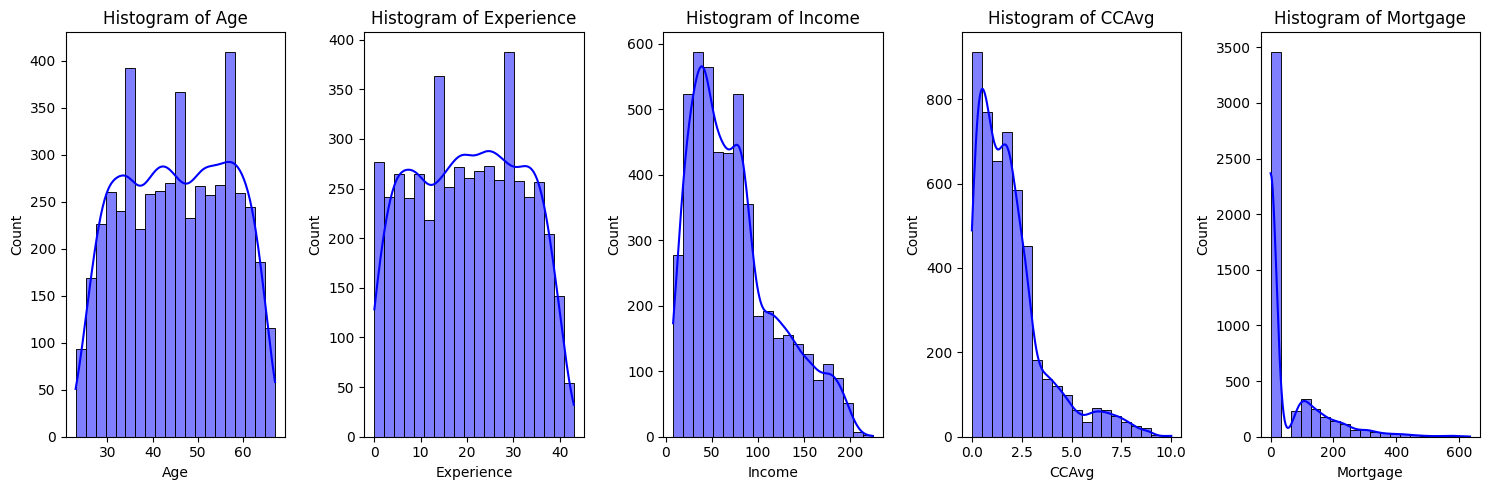

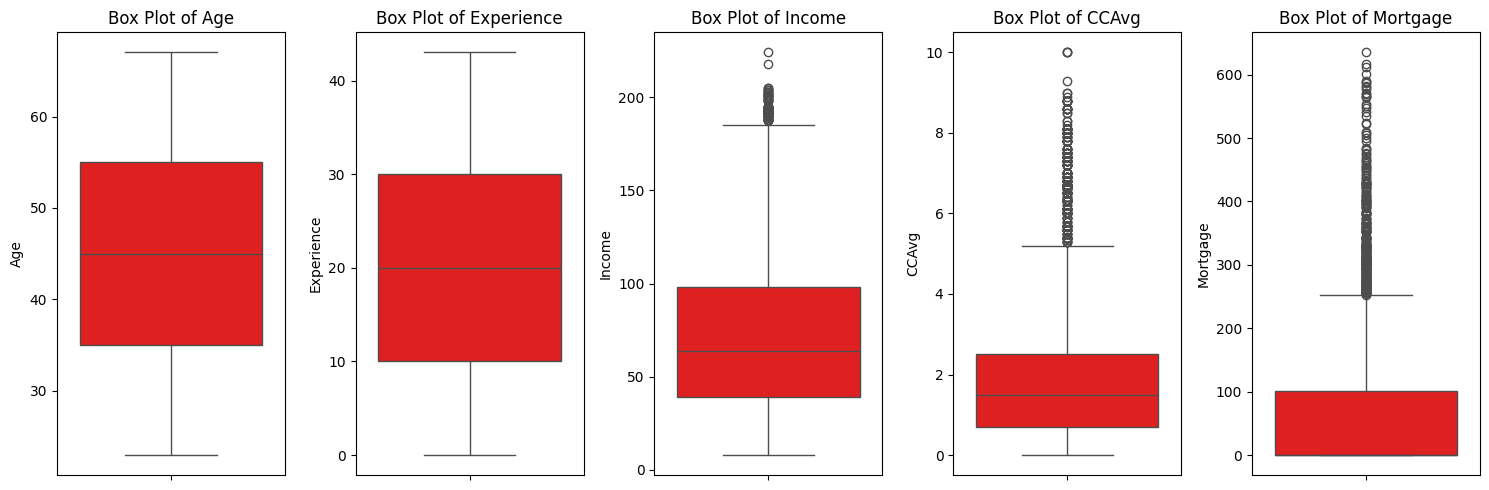

In [ ]:
# Plot histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i + 1)
    sns.boxplot(y=df[col], color='red')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

- Age has close to normal distribution with 3 categories of age having high occurences.
- Experience is nearly uniformly distributed for most part. There are less people with experience of more than 37 years.
- Income, CCAvg and Mortgage are right skewed. Most of the people have not taken a mortgage(nearly 3500).

In [ ]:
# List of categorical variables
cat_vars = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

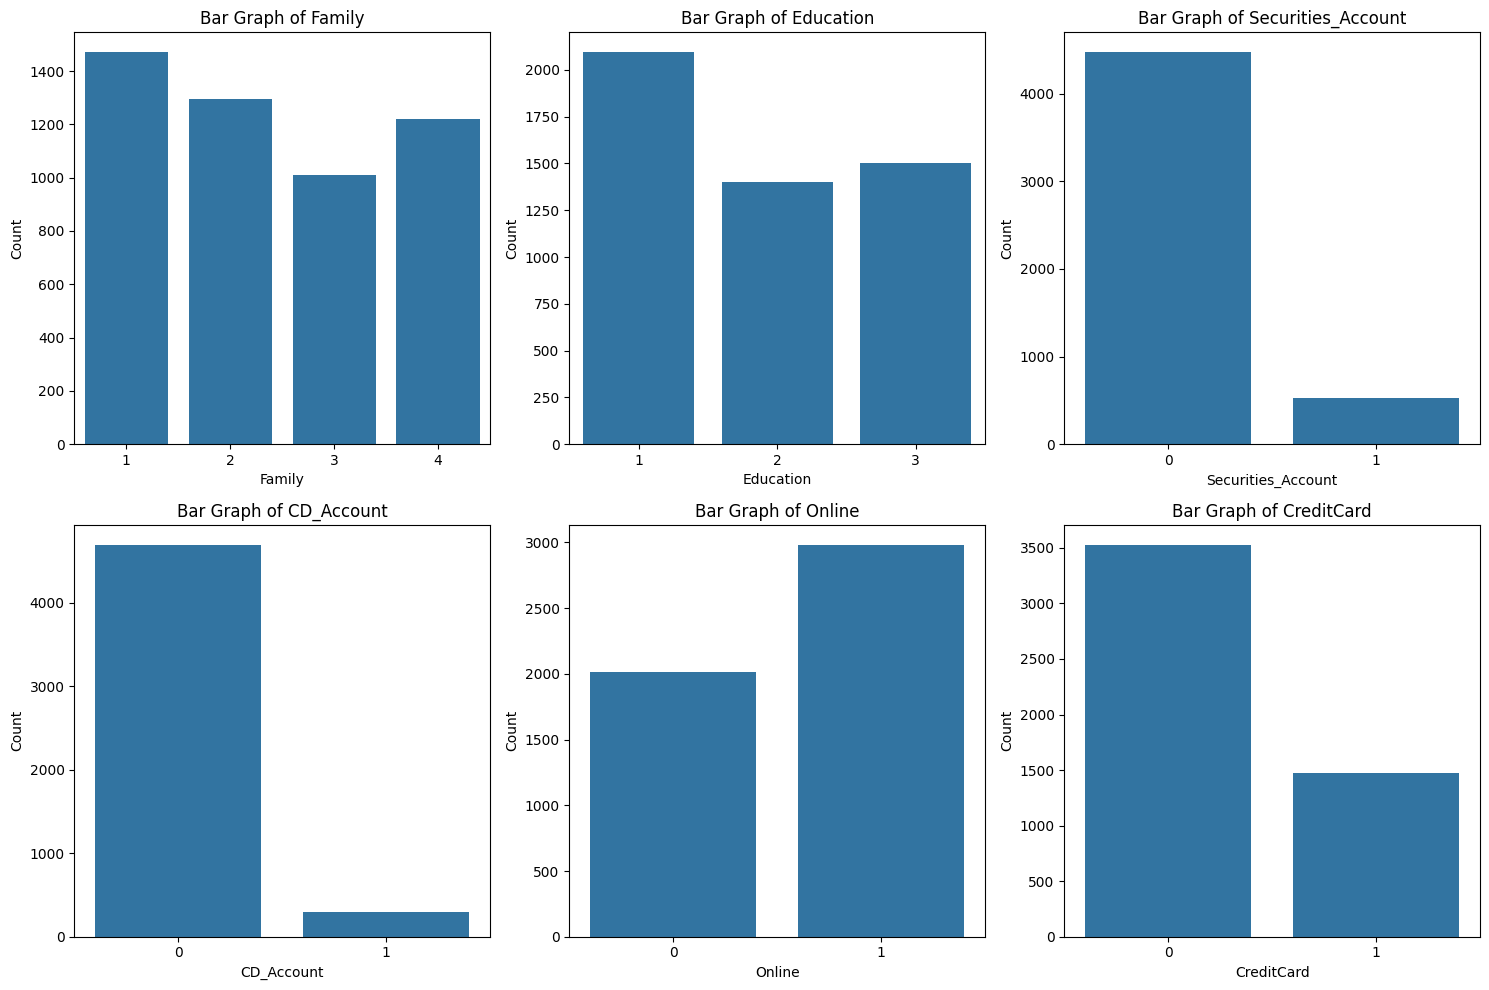

In [ ]:
# Plot bar graphs
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars):
    plt.subplot(2, 3, i + 1)  # Adjust rows/cols based on the number of variables
    sns.countplot(x=df[col])
    plt.title(f'Bar Graph of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Most of the customers are single(nearly 1400). Those with family size of 3 are the least(1000). Customers with family size of 2 and 4 are nearly 1200.
- More than 2000 of the customers are undergraduates. Post graduates are nearly 1400 and Professionals are 1500 in numbers.
- Over 4500 of the customers do not have a securities account. Only about 500 have one.
- Most of the customers don not have a CD Account. Only about 250 customers have a CD Account.
- ~3000 customers use internet banking facilities. ~2000 of them do not.
- ~3500 of the customers have not used a credit card issued by other banks. ~1500 of them have used credit card(s) from other banks.

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



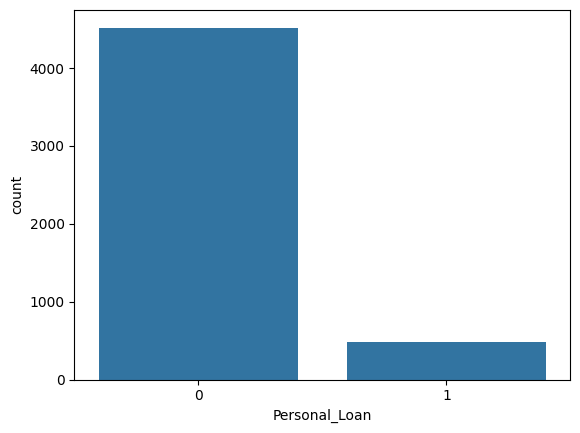

In [ ]:
# Print the percentage distribution of the 'Personal_Loan' column
print(100 * df['Personal_Loan'].value_counts(normalize=True), '\n')

# Plot a countplot for the 'Personal_Loan' column
sns.countplot(x=df['Personal_Loan']);

- ~90% of the customers have not accepted the personal loan offered in the previous campaign. ~10% of them have accepted.

## Bivariate Analysis


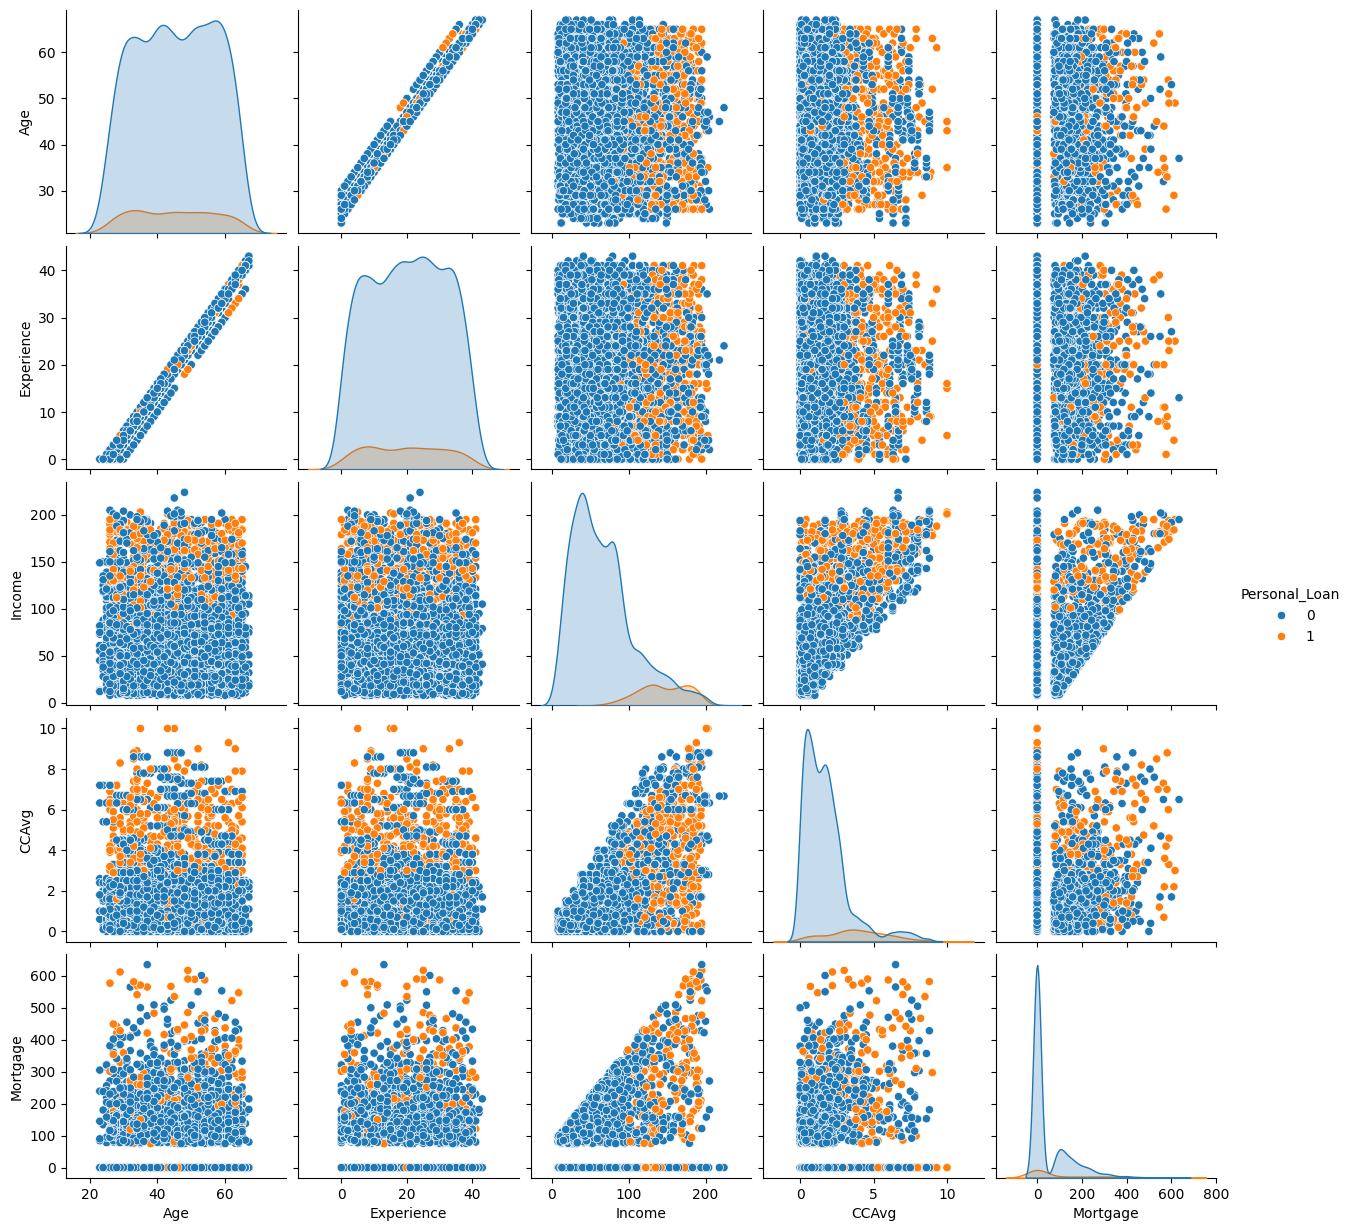

In [ ]:
# Pairplot to visualize relationships between numerical variables, colored by 'Personal_Loan'
sns.pairplot(df, hue='Personal_Loan', vars=num_vars, diag_kind='kde');

- People who have taken Mortgage of higher value, those with higher Income, and those with higher CCAvg are most likely to take a personal loan.

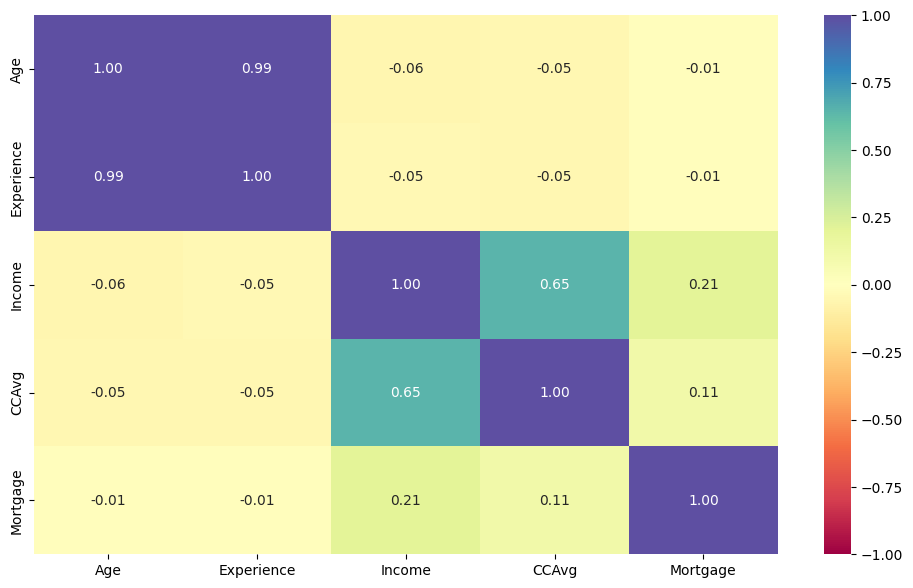

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Create a heatmap to show the correlation between numerical variables
sns.heatmap(df[num_vars].corr(), vmin=-1, fmt='.2f', annot=True, cmap='Spectral');

- As expected, Age and Experience are very highly correlated.
- CCAvg tends to increase as Income increases.
- There isn't any strong correlation between any other variables.

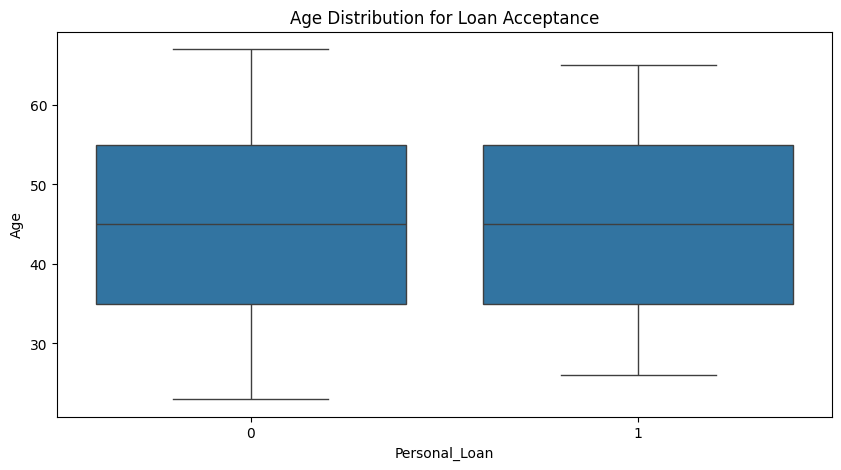

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a boxplot to show the age distribution for loan acceptance
sns.boxplot(x=df['Personal_Loan'], y=df['Age'])
plt.title('Age Distribution for Loan Acceptance')

# Display the plot
plt.show()

- Age has no significant impact on acceptance of personal loan.

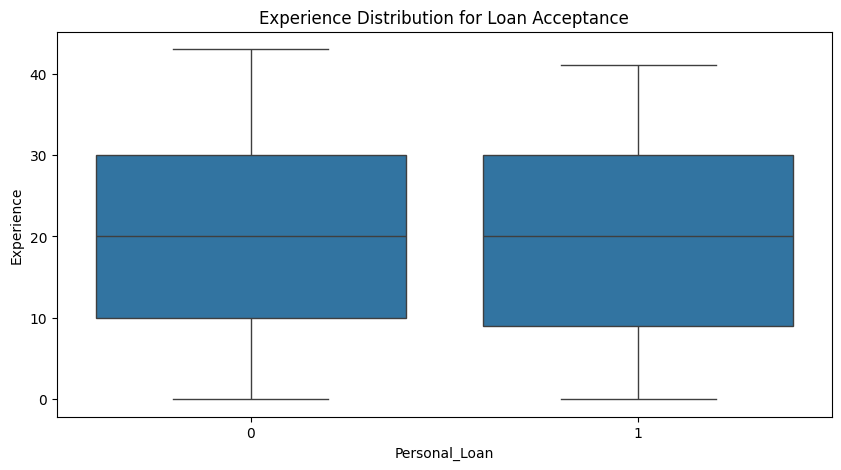

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a boxplot to show the experience distribution for loan acceptance
sns.boxplot(x=df['Personal_Loan'], y=df['Experience'])
plt.title('Experience Distribution for Loan Acceptance')

# Display the plot
plt.show()

- Experience doens't seem to have any effect on acceptance of personal loan.

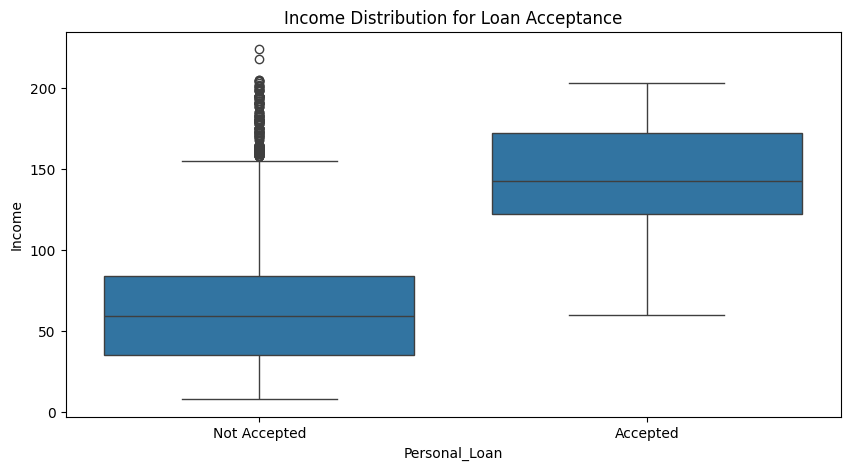

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a boxplot to show the income distribution for loan acceptance
sns.boxplot(x=df['Personal_Loan'], y=df['Income'])
plt.title("Income Distribution for Loan Acceptance")

# Set custom labels for the x-axis
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])

# Display the plot
plt.show()

- People with higher Income are more likely to accept the personal loan.

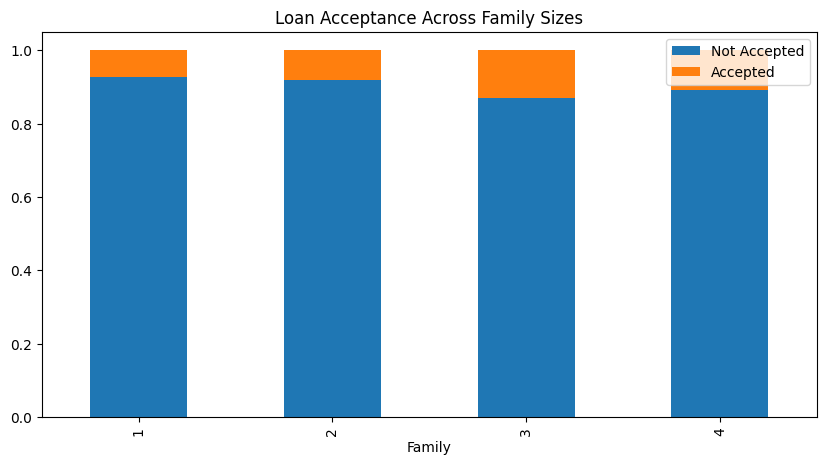

In [ ]:
# Create a crosstab to show the proportion of loan acceptance across family sizes
ct = pd.crosstab(df['Family'], df['Personal_Loan'], normalize='index')

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Loan Acceptance Across Family Sizes")
plt.legend(["Not Accepted", "Accepted"])

# Display the plot
plt.show()


- People with a family size of 3 and 4 are more likely to accept a personal loan.
- Even those with a family size of 1 and 2 have good chances of accepting a personal loan.


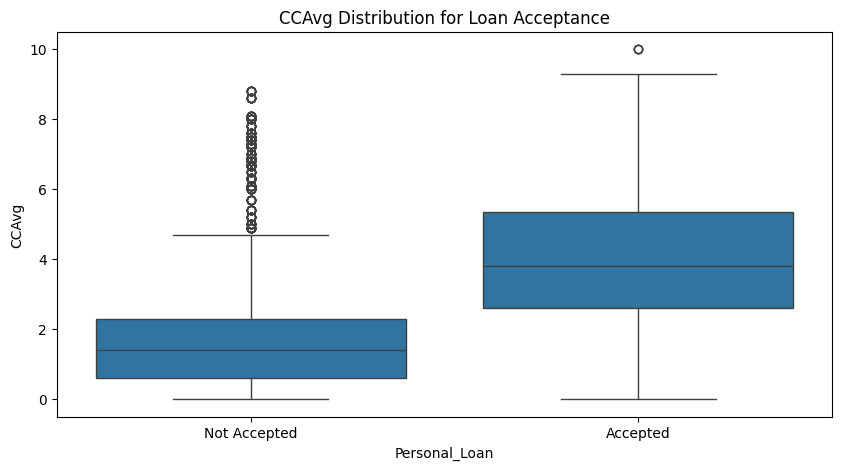

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a boxplot to show the credit card average spending distribution for loan acceptance
sns.boxplot(x=df['Personal_Loan'], y=df['CCAvg'])
plt.title("CCAvg Distribution for Loan Acceptance")

# Set custom labels for the x-axis
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])

# Display the plot
plt.show()


- Those with higher CCAvg have a better chance of accept a personal loan. Those with CCAvg above 5 have a very high chance of accepting the loan.

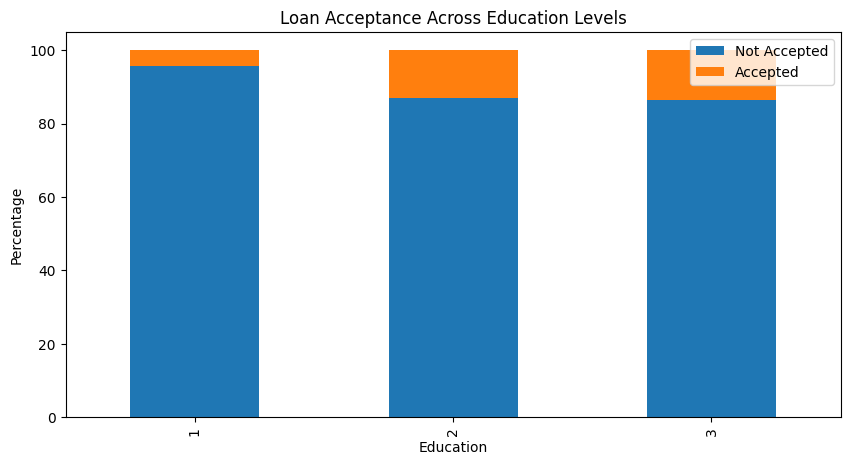

In [ ]:
# Create a crosstab for Education & Loan
ct = pd.crosstab(df['Education'], df['Personal_Loan'], normalize='index') * 100

# Plot Stacked Bar Chart
ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Loan Acceptance Across Education Levels")
plt.ylabel("Percentage")
plt.legend(["Not Accepted", "Accepted"])
plt.show()

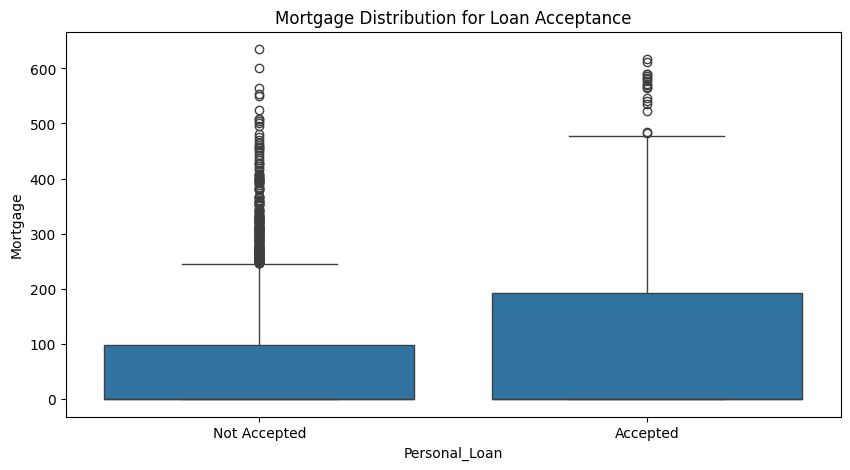

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a boxplot to show the mortgage distribution for loan acceptance
sns.boxplot(x=df['Personal_Loan'], y=df['Mortgage'])
plt.title("Mortgage Distribution for Loan Acceptance")

# Set custom labels for the x-axis
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])

# Display the plot
plt.show()

In [ ]:
# Compute correlation between 'Mortgage' and 'Personal_Loan'
corr_value = df['Mortgage'].corr(df['Personal_Loan'])

# Print the correlation value
print(f"Correlation between Mortgage and Loan Acceptance: {corr_value:.2f}")


Correlation between Mortgage and Loan Acceptance: 0.14


- Mortgage is not a strong predictor for loan acceptance.

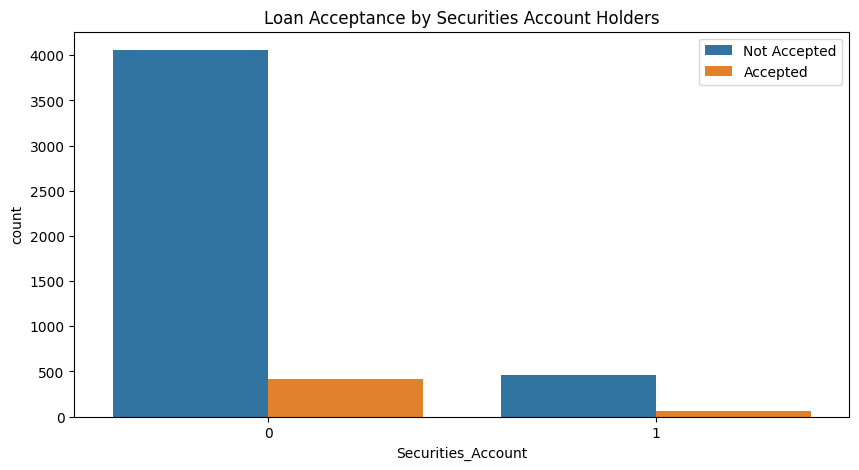

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a countplot to show loan acceptance by securities account holders
sns.countplot(x=df['Securities_Account'], hue=df['Personal_Loan'])
plt.title("Loan Acceptance by Securities Account Holders")
plt.legend(["Not Accepted", "Accepted"])

# Display the plot
plt.show()

- A person having or not having a securities account has limited power in determining if the person will accept a personal loan.

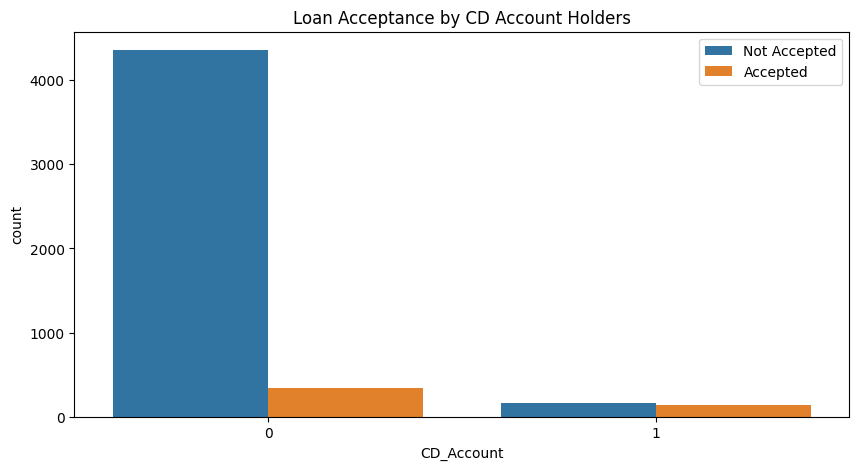

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a countplot to show loan acceptance by CD account holders
sns.countplot(x=df['CD_Account'], hue=df['Personal_Loan'])
plt.title("Loan Acceptance by CD Account Holders")
plt.legend(["Not Accepted", "Accepted"])

# Display the plot
plt.show()


- Among those who hold a CD Account, there is a ~50% chance that a person will accept a personal loan.

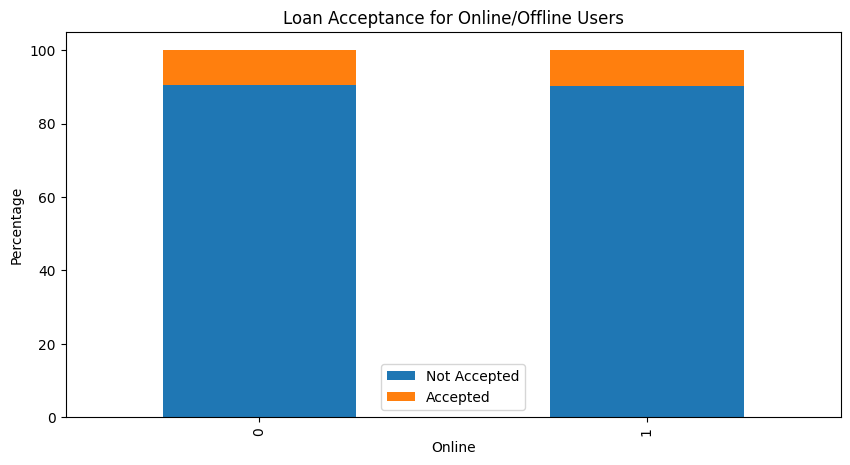

In [ ]:
# Create a crosstab for Online banking usage & Loan acceptance, normalized by row and converted to percentage
ct = pd.crosstab(df['Online'], df['Personal_Loan'], normalize='index') * 100

# Plot a stacked bar chart to show loan acceptance for online/offline users
ct.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Loan Acceptance for Online/Offline Users")
plt.ylabel("Percentage")
plt.legend(["Not Accepted", "Accepted"])

# Display the plot
plt.show()


- Whether a personal uses internet banking facilities is also not a good predictor for acceptance of personal loan.

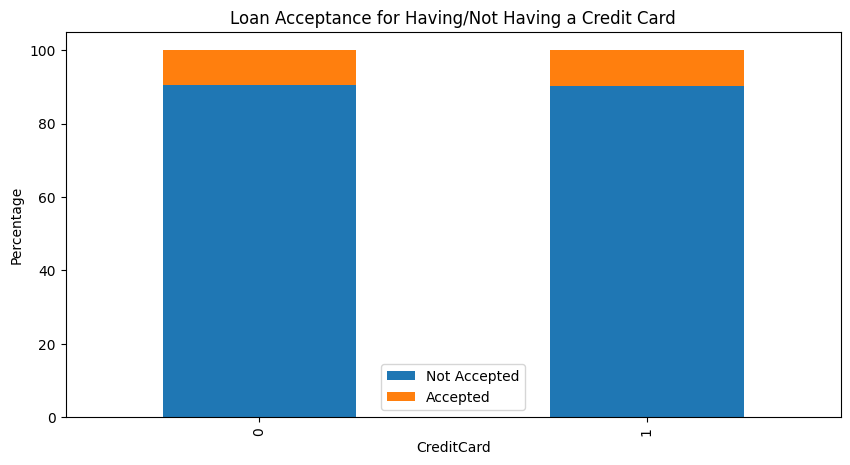

In [ ]:
# Create a crosstab for Credit Card ownership & Loan acceptance, normalized by row and converted to percentage
ct = pd.crosstab(df['CreditCard'], df['Personal_Loan'], normalize='index') * 100

# Plot a stacked bar chart to show loan acceptance for individuals with and without a credit card
ct.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Loan Acceptance for Having/Not Having a Credit Card")
plt.ylabel("Percentage")
plt.legend(["Not Accepted", "Accepted"])

# Display the plot
plt.show()


- Among those who use and those who do not use a credit card issued from other banks, the percentage of acceptance of loan is approximately equal.

# **Data Preparation for Modeling**

In [ ]:
# importing necessary libraries
# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [ ]:
# First, we will drop ID and Zipcode columns since they are redundant and we are sure that they won't help the decision tree model in making splits.

df = df.drop(['ID', 'ZIPCode'], axis = 1)

In [ ]:
# defining the explanatory (independent) and response (dependent) variables
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

In [ ]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [ ]:
# splitting the data in an 80:20 ratio for train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
# Print the shape of the training and test sets
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')

# Print the percentage distribution of classes in the training set
print("Percentage of classes in training set:")
print(100 * y_train.value_counts(normalize=True), '\n')

# Print the percentage distribution of classes in the test set
print("Percentage of classes in test set:")
print(100 * y_test.value_counts(normalize=True))


Shape of training set: (4000, 11)
Shape of test set: (1000, 11) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = round(accuracy_score(target, pred), 3)  # to compute Accuracy
    recall = round(recall_score(target, pred), 3)  # to compute Recall
    precision = round(precision_score(target, pred), 3)  # to compute Precision
    f1 = round(f1_score(target, pred), 3)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot confusion matrix
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

In [ ]:
# defining a funciton to visualize decision trees
def plot_decision_tree(dt, X):
# list of feature names in X_train
    feature_names = list(X.columns)

    # set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # plotting the decision tree
    out = tree.plot_tree(
        dt,                         # decision tree classifier model
        feature_names=feature_names,    # list of feature names (columns) in the dataset
        filled=True,                    # fill the nodes with colors based on class
        fontsize=9,                     # font size for the node text
        node_ids=False                 # do not show the ID of each node
        # class_names=None,               # whether or not to display class names
    )

    # add arrows to the decision tree splits if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")    # set arrow color to black
            arrow.set_linewidth(1)          # set arrow linewidth to 1

    # displaying the plot
    plt.show()

In [ ]:
# defining a text to see the node split rules of the decision tree

def decision_tree_text(dt, X):
    print(
    tree.export_text(
        dt2,    # specify the model
        feature_names=list(X.columns),    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

In [ ]:
# Initialize Decision Tree Classifier with a random state
dt1 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the model's performance on the training set
dt1_train_perf = model_performance_classification(dt1, X_train, y_train)

# Display the performance metrics
dt1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

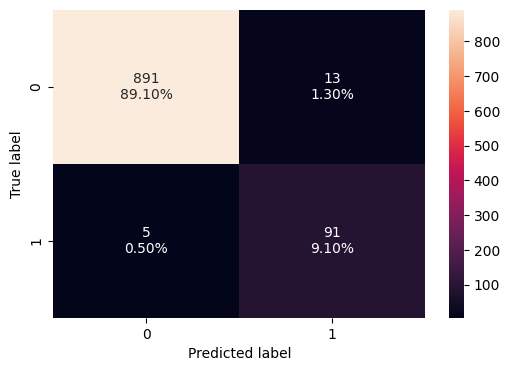

In [ ]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(dt1, X_test, y_test)

In [ ]:
# Evaluate the model's performance on the test set
dt1_test_perf = model_performance_classification(dt1, X_test, y_test)

# Display the performance metrics
dt1_test_perf

Accuracy  Recall  Precision    F1
0     0.982   0.948      0.875  0.91

In [ ]:
# Get feature importance values from the trained Decision Tree model
feature_importance = dt1.feature_importances_

# Create a DataFrame to store feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Print the feature importance DataFrame
print(importance_df)

               Feature  Importance
0                  Age    0.014057
1           Experience    0.009147
2               Income    0.408893
3               Family    0.143465
4                CCAvg    0.074660
5            Education    0.303688
6             Mortgage    0.020635
7   Securities_Account    0.001920
8           CD_Account    0.018746
9               Online    0.004789
10          CreditCard    0.000000


In [ ]:
# Define the input columns by dropping columns the ones with low feature importance
X = df.drop(['Personal_Loan', 'CreditCard', 'Online', 'Securities_Account'], axis=1)

# Define the target variable
y = df["Personal_Loan"]

In [ ]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  CD_Account
0   25           1      49       4    1.6          1         0           0
1   45          19      34       3    1.5          1         0           0
2   39          15      11       1    1.0          1         0           0
3   35           9     100       1    2.7          2         0           0
4   35           8      45       4    1.0          2         0           0

In [ ]:
# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Initialize Decision Tree Classifier without specifying parameters
dt2 = DecisionTreeClassifier()

# Train the model on the training data
dt2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate the model's performance on the training set
dt2_train_perf = model_performance_classification(dt2, X_train, y_train)

# Display the performance metrics
dt2_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

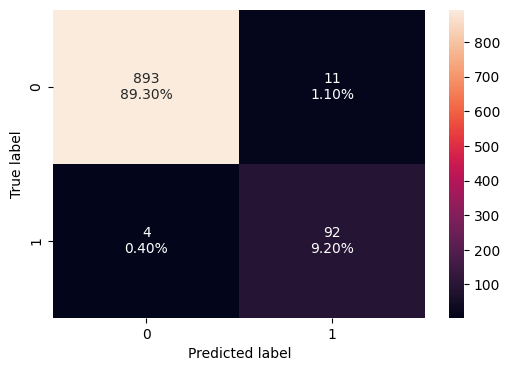

In [ ]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(dt2, X_test, y_test)

In [ ]:
# Evaluate the model's performance on the test set
dt2_test_perf = model_performance_classification(dt2, X_test, y_test)

# Display the performance metrics
dt2_test_perf

Accuracy  Recall  Precision     F1
0     0.985   0.958      0.893  0.925

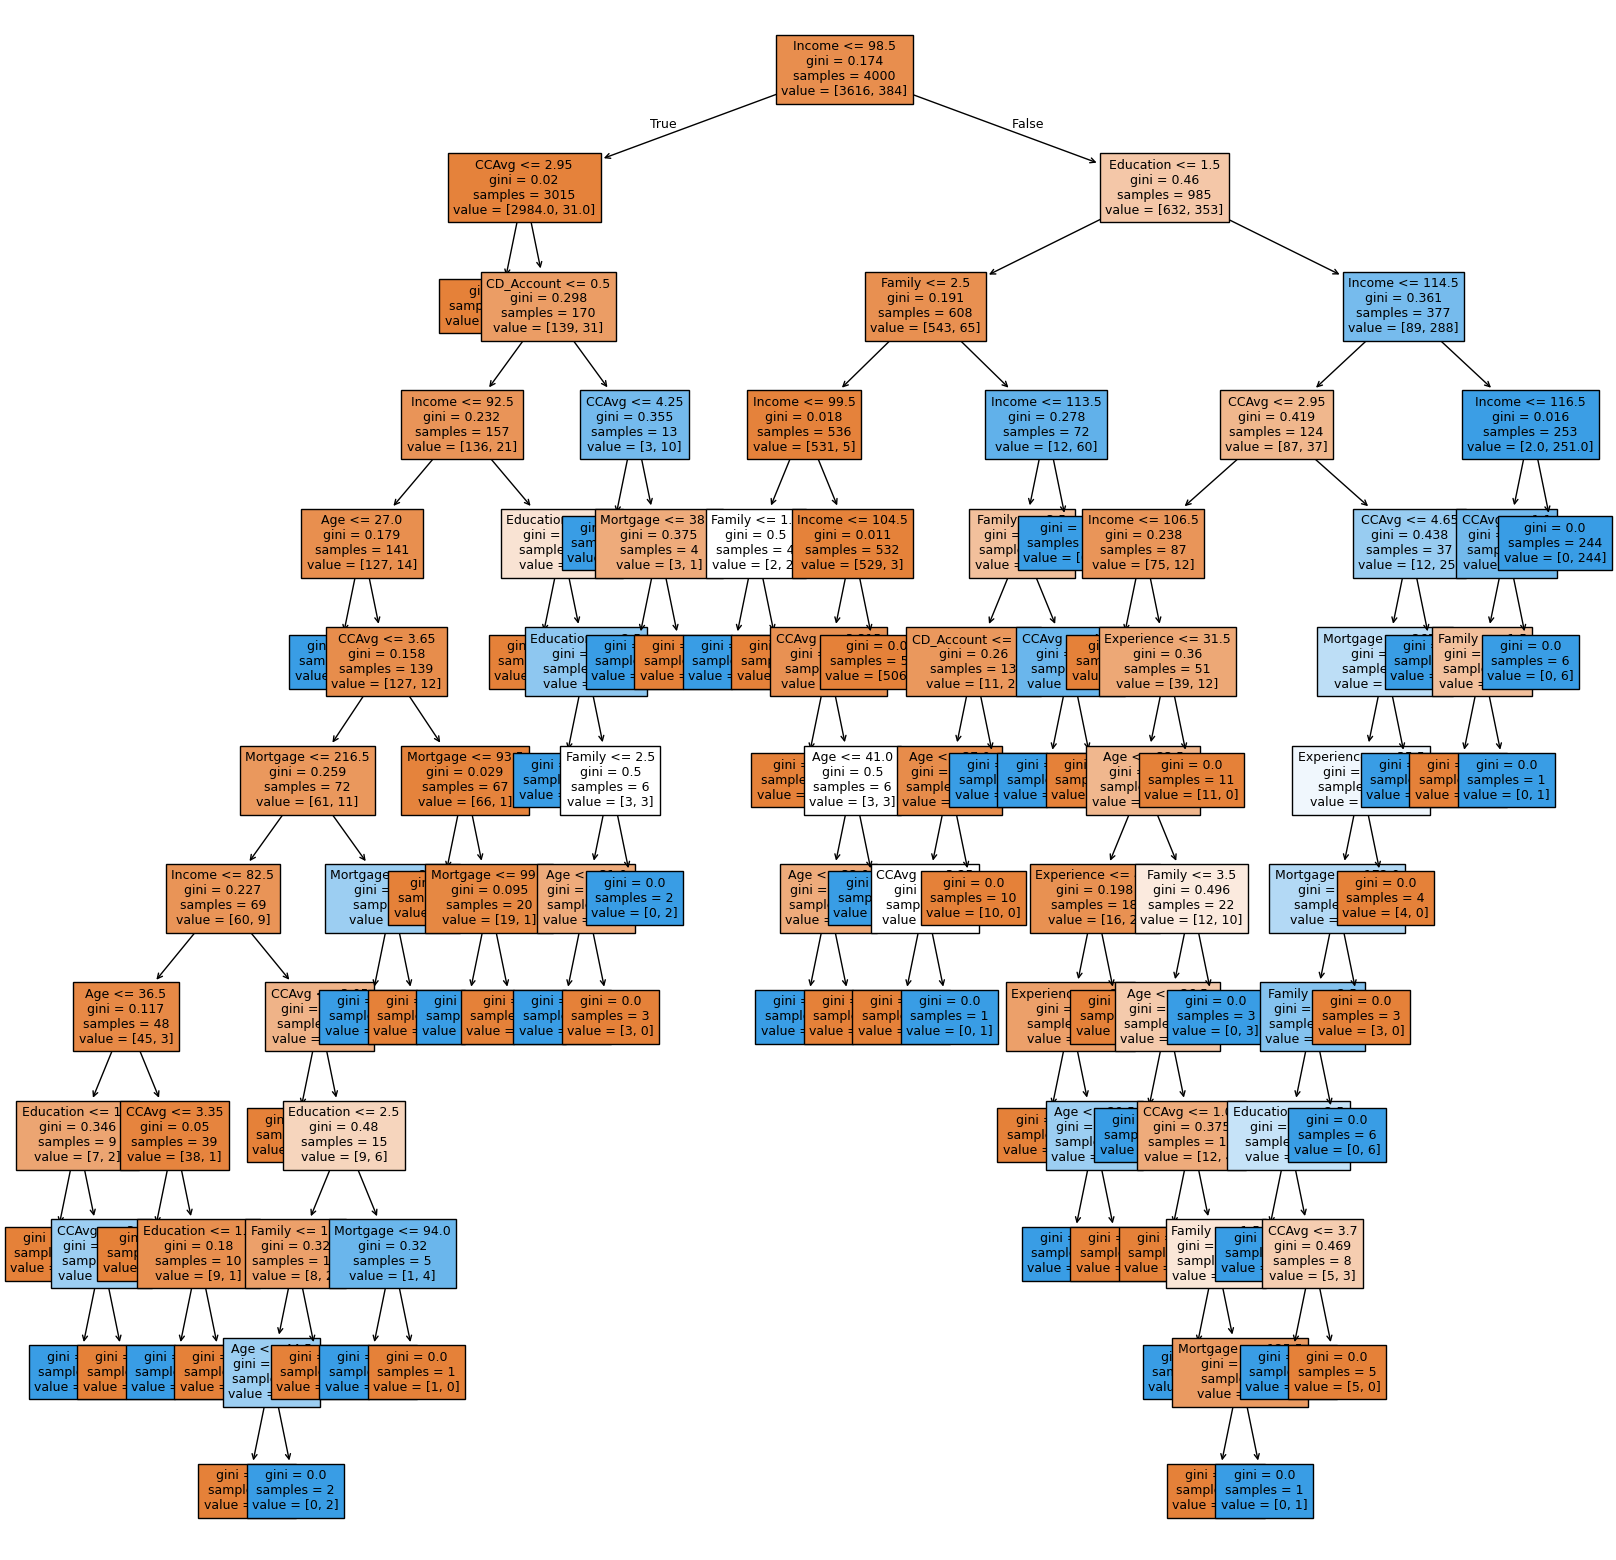

In [ ]:
# Plot the decision tree structure for the trained model
plot_decision_tree(dt2, X_train)

In [ ]:
# Generate and display the text representation of the decision tree
decision_tree_text(dt2, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Ag

- Since this is an imbalanced dataset and we need both precision and recall to be high, we will mainly focus on F1 Score.
- The F1 score on the training set is 100 but the same on the test set is 91. We want our model to generalize well. So, we'll prune the tree and then select the best model.

## Pre-Pruning

In [ ]:
# defining a function to pre-prune the tree
def pre_pruning(max_depth_values, max_leaf_nodes_values, min_samples_leaf_values, min_samples_split_values):
    # initialize variables to store the best model and its performance
    best_estimator = None
    best_score_diff = float('inf')

    # iterate over all combinations of the specified parameter values
    for max_depth in max_depth_values:
        for max_leaf_nodes in max_leaf_nodes_values:
            for min_samples_leaf in min_samples_leaf_values:
                for min_samples_split in min_samples_split_values:

                # initialize the tree with the current set of parameters
                    estimator = DecisionTreeClassifier(
                        max_depth=max_depth,
                        max_leaf_nodes=max_leaf_nodes,
                        min_samples_leaf=min_samples_leaf,
                        min_samples_split=min_samples_split,
                        random_state=42
                    )

                    # fit the model to the training data
                    estimator.fit(X_train, y_train)

                    # make predictions on the training and test sets
                    y_train_pred = estimator.predict(X_train)
                    y_test_pred = estimator.predict(X_test)

                    # calculate F1 scores for training and test sets
                    train_f1_score = f1_score(y_train, y_train_pred)
                    test_f1_score = f1_score(y_test, y_test_pred)

                    # calculate the absolute difference between training and test F1 scores
                    score_diff = abs(train_f1_score - test_f1_score)

                    # update the best estimator and best score if the current one has a smaller score difference
                    if score_diff < best_score_diff:
                        best_score_diff = score_diff
                        best_estimator = estimator

    return best_estimator

In [ ]:
# Define the parameters of the decision tree to iterate over
max_depth_values = np.arange(2, 12, 1)
max_leaf_nodes_values = np.arange(5, 20, 3)
min_samples_leaf_values = np.arange(5, 20, 3)
min_samples_split_values = np.arange(5, 20, 3)

# Perform pre-pruning using the defined parameter ranges
dt3 = pre_pruning(max_depth_values, max_leaf_nodes_values, min_samples_leaf_values, min_samples_split_values)

In [ ]:
# Train the pre-pruned Decision Tree model on the training data
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [ ]:
# Evaluate the model's performance on the training set
dt3_train_perf = model_performance_classification(dt3, X_train, y_train)

# Display the performance metrics
dt3_train_perf

Accuracy  Recall  Precision     F1
0     0.954    0.75      0.764  0.757

In [ ]:
# Evaluate the model's performance on the test set
dt3_test_perf = model_performance_classification(dt3, X_test, y_test)

# Display the performance metrics
dt3_test_perf

Accuracy  Recall  Precision     F1
0     0.949   0.781      0.714  0.746

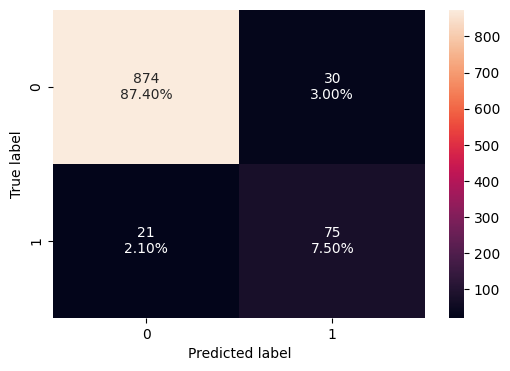

In [ ]:
# Plot the confusion matrix for the pre-pruned Decision Tree model on the test set
plot_confusion_matrix(dt3, X_test, y_test)

In [ ]:
# Get the parameters of the pre-pruned Decision Tree model
dt3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

- With the given values of the hyperparameters, we are getting a bad performance. Let's try with different values.

In [ ]:
# Define the parameters of the decision tree to iterate over
max_depth_values = np.arange(4, 10, 1)
max_leaf_nodes_values = np.arange(5, 20, 3)
min_samples_leaf_values = np.arange(5, 20, 3)
min_samples_split_values = np.arange(5, 20, 3)

# Perform pre-pruning using the defined parameter ranges
dt4 = pre_pruning(max_depth_values, max_leaf_nodes_values, min_samples_leaf_values, min_samples_split_values)


In [ ]:
# Evaluate the model's performance on the training set
dt4_train_perf = model_performance_classification(dt4, X_train, y_train)

# Display the performance metrics
dt4_train_perf

Accuracy  Recall  Precision     F1
0     0.985   0.888      0.953  0.919

In [ ]:
# Evaluate the model's performance on the test set
dt4_test_perf = model_performance_classification(dt4, X_test, y_test)

# Display the performance metrics
dt4_test_perf

Accuracy  Recall  Precision     F1
0     0.987   0.938      0.928  0.933

- Now, we are getting good performance of the model and the model is generalizing well. Let's see if we can further improve.

In [ ]:
# Define the parameters of the decision tree to iterate over
max_depth_values = np.arange(4, 19, 2)
max_leaf_nodes_values = np.arange(15, 50, 5)
min_samples_leaf_values = np.arange(2, 13, 2)
min_samples_split_values = np.arange(2, 13, 2)

# Perform pre-pruning using the defined parameter ranges
dt5 = pre_pruning(max_depth_values, max_leaf_nodes_values, min_samples_leaf_values, min_samples_split_values)

In [ ]:
# Evaluate the model's performance on the training set
dt5_train_perf = model_performance_classification(dt5, X_train, y_train)

# Display the performance metrics
dt5_train_perf

Accuracy  Recall  Precision     F1
0     0.991   0.919      0.981  0.949

In [ ]:
# Evaluate the model's performance on the test set
dt5_test_perf = model_performance_classification(dt5, X_test, y_test)

# Display the performance metrics
dt5_test_perf

Accuracy  Recall  Precision     F1
0      0.99   0.958      0.939  0.948

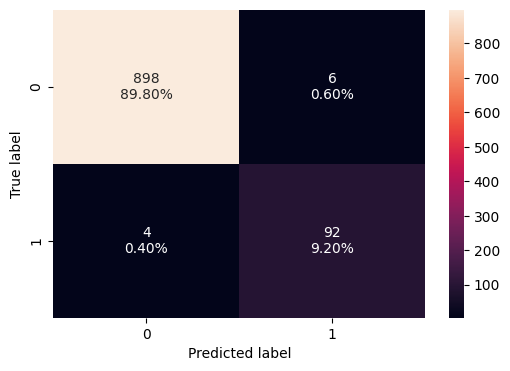

In [ ]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(dt5, X_test, y_test)

In [ ]:
# Get the parameters of the pre-pruned Decision Tree model
dt5.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

- This model is performing very well and the F1 score on both the train and test sets is 0.948.

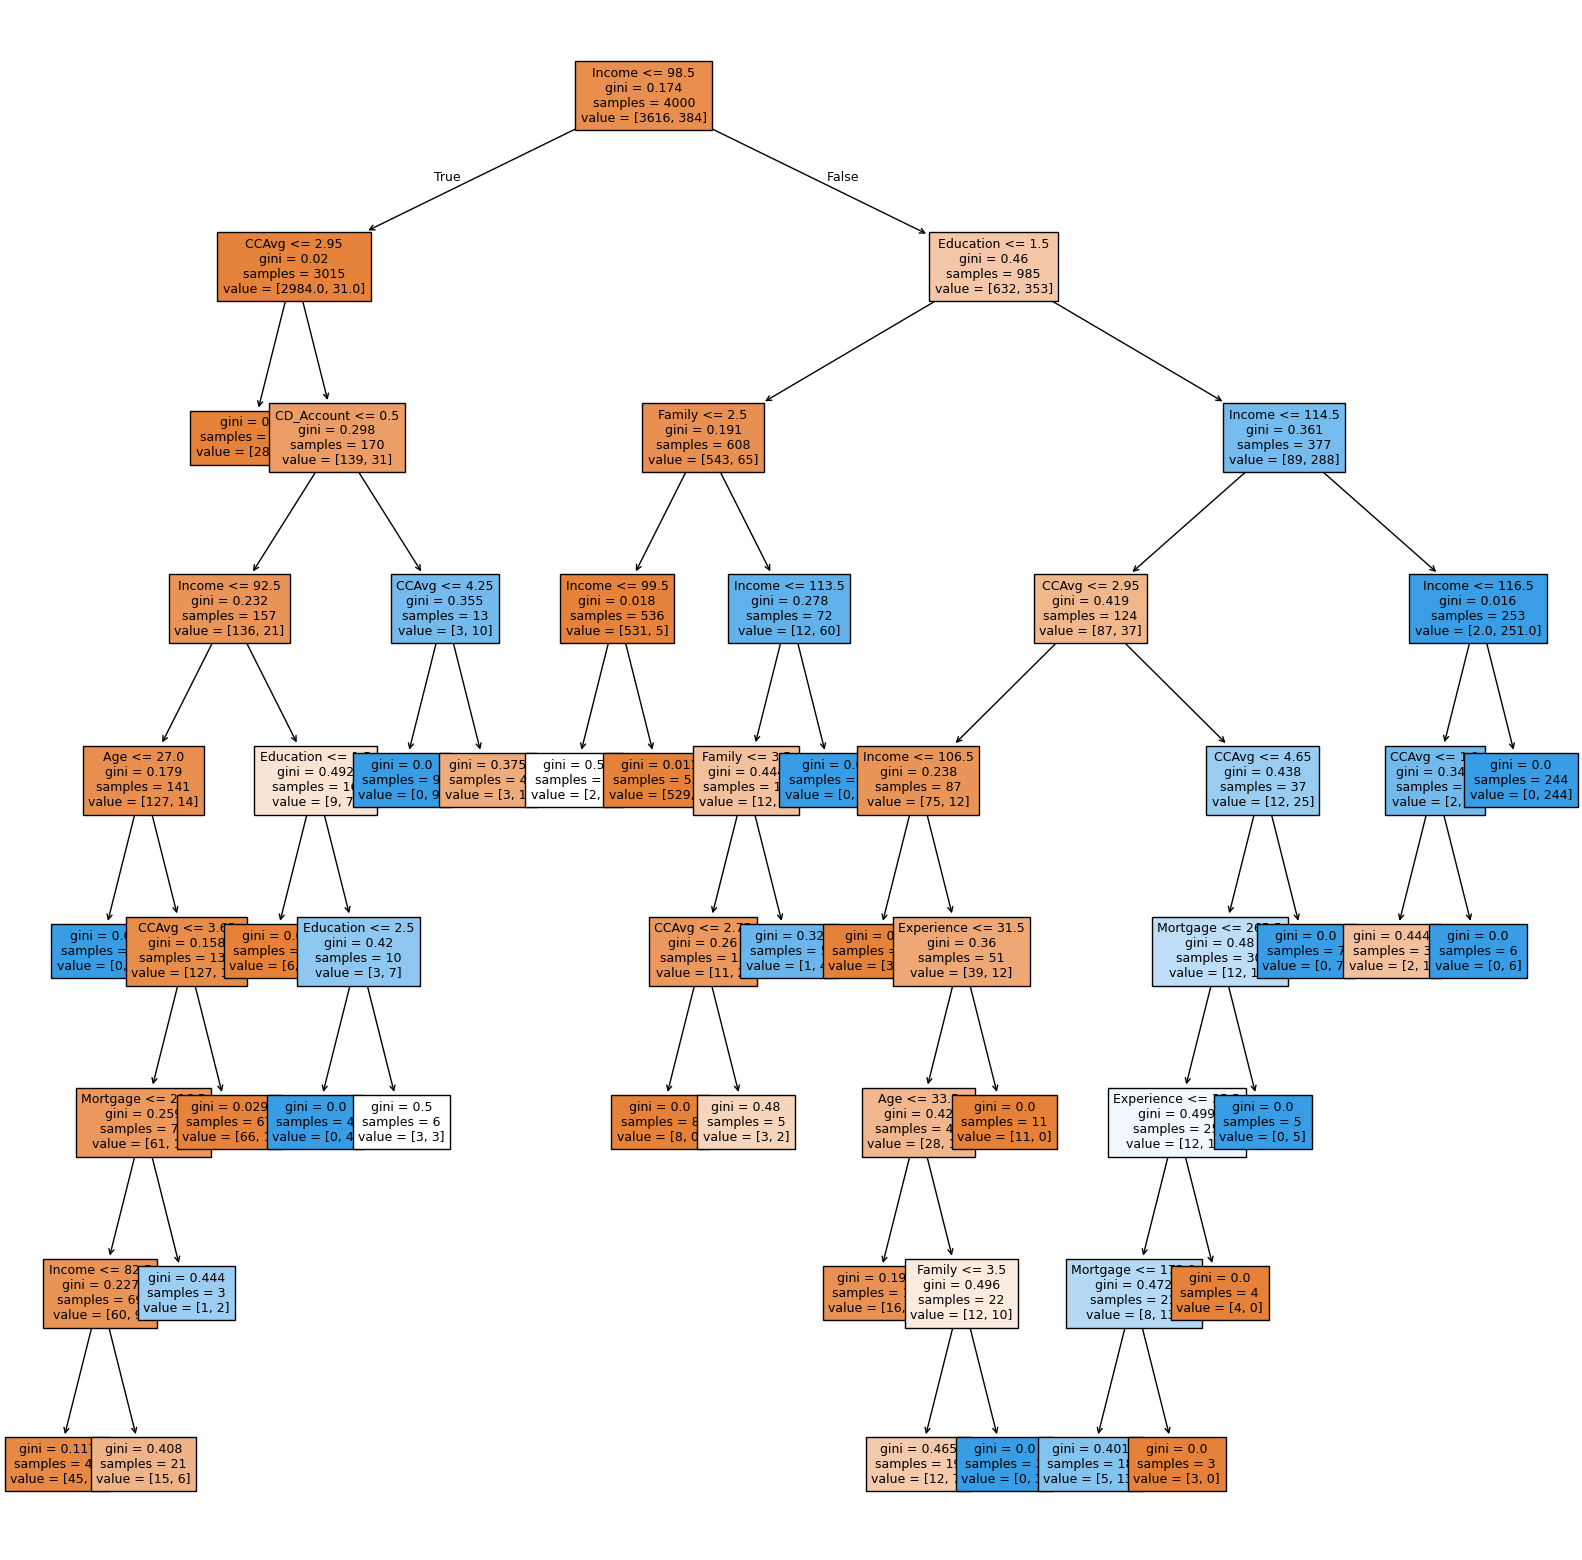

In [ ]:
# Plot the decision tree structure for the trained model
plot_decision_tree(dt5, X_train)

In [ ]:
# Generate and display the text representation of the decision tree
decision_tree_text(dt5, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Ag

- Let's check to see if we can getter a better model using post pruning.

## Post- Pruning

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000229    0.000458
2     0.000244    0.000946
3     0.000246    0.001438
4     0.000296    0.002327
5     0.000306    0.003246
6     0.000331    0.004238
7     0.000333    0.004571
8     0.000333    0.004905
9     0.000350    0.005955
10    0.000373    0.007446
11    0.000375    0.007821
12    0.000388    0.008209
13    0.000400    0.008609
14    0.000400    0.009009
15    0.000400    0.009809
16    0.000417    0.010226
17    0.000419    0.012742
18    0.000493    0.013727
19    0.000542    0.014811
20    0.000550    0.017010
21    0.000584    0.017594
22    0.000651    0.020848
23    0.000754    0.021602
24    0.000779    0.022381
25    0.000823    0.023204
26    0.000870    0.024945
27    0.002424    0.027369
28    0.002667    0.030036
29    0.003000    0.033036
30    0.003753    0.036789
31    0.020023    0.056812
32    0.021549    0.078361
33    0.047604    0.173568

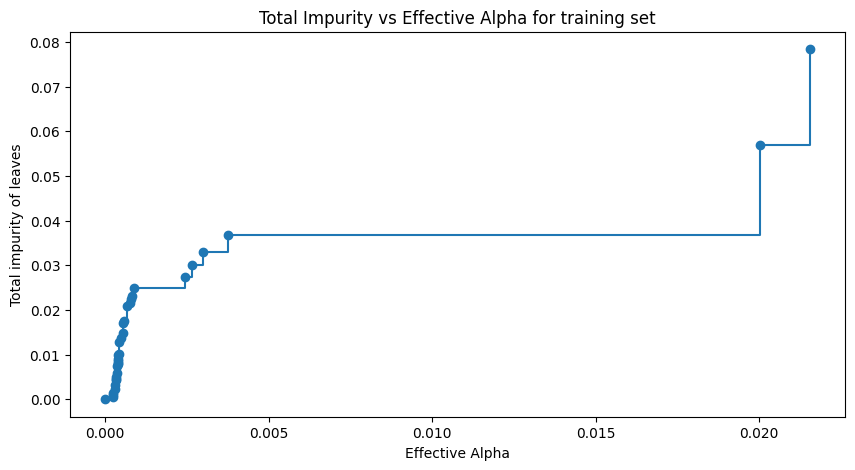

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815694


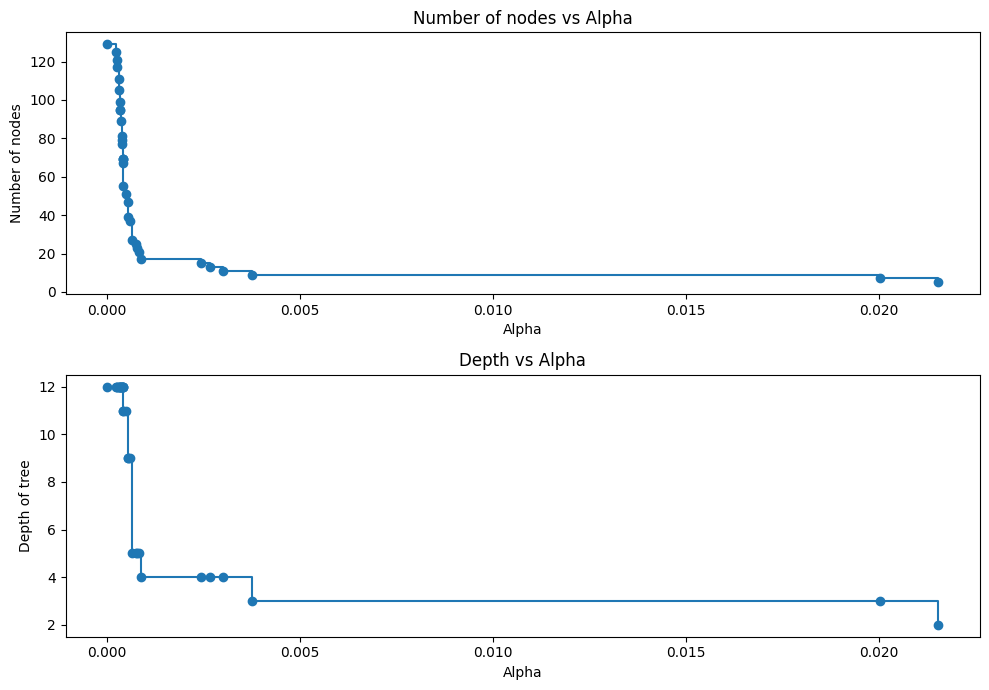

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


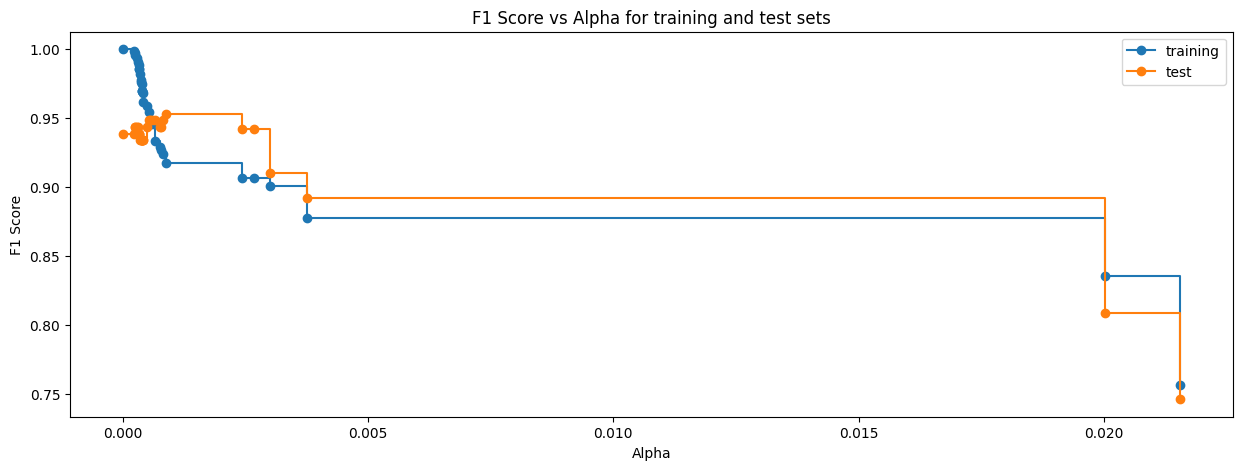

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dt6 = clfs[index_best_model]
print(dt6)

DecisionTreeClassifier(ccp_alpha=0.0008702884311333967, random_state=42)


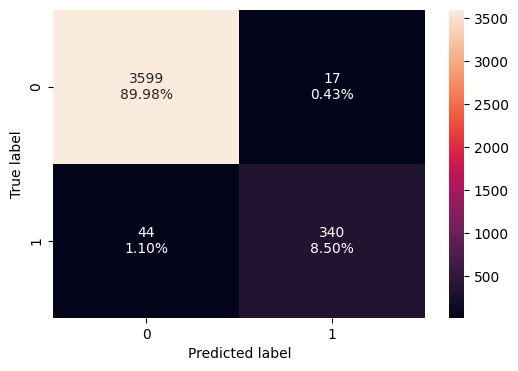

In [ ]:
# Plot the confusion matrix for the Decision Tree model on the training set
plot_confusion_matrix(dt6, X_train, y_train)

In [ ]:
# Evaluate the model's performance on the training set
dt6_train_perf = model_performance_classification(dt6, X_train, y_train)

# Display the performance metrics
dt6_train_perf

Accuracy  Recall  Precision     F1
0     0.985   0.885      0.952  0.918

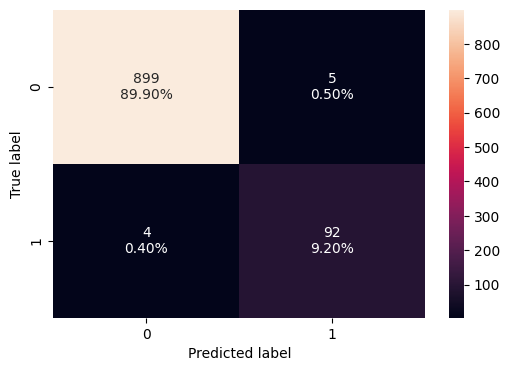

In [ ]:
# Plot the confusion matrix for the Decision Tree model on the test set
plot_confusion_matrix(dt6, X_test, y_test)

In [ ]:
# Evaluate the model's performance on the test set
dt6_test_perf = model_performance_classification(dt6, X_test, y_test)

# Display the performance metrics
dt6_test_perf

Accuracy  Recall  Precision     F1
0     0.991   0.958      0.948  0.953

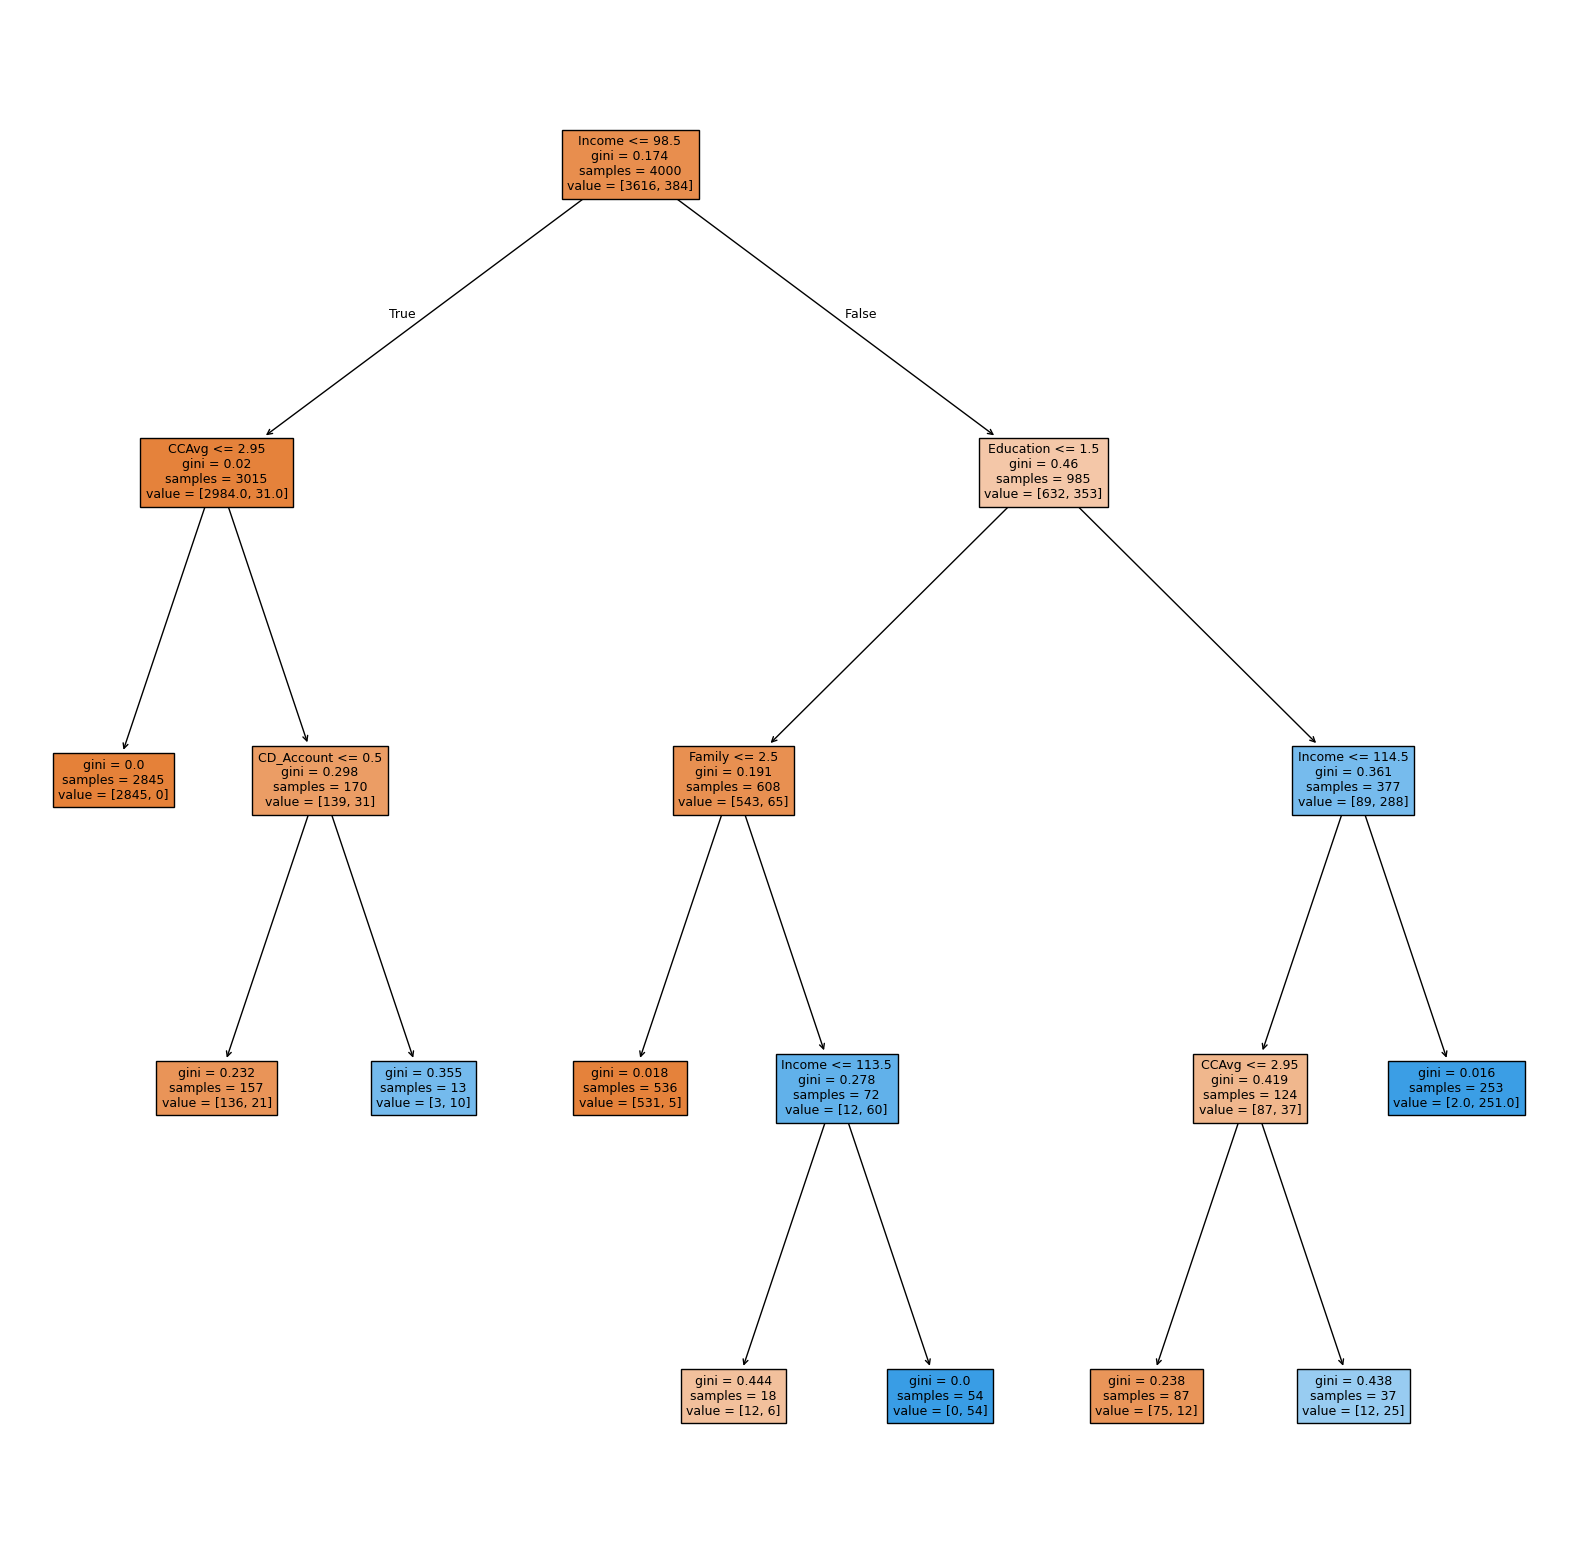

In [ ]:
# Plot the decision tree structure for the trained model
plot_decision_tree(dt6, X_train)

In [ ]:
# Generate and display the text representation of the decision tree
decision_tree_text(dt6, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Ag

In [ ]:
# Compare the training performance of different Decision Tree models
models_train_comp_df = pd.concat(
    [
        dt2_train_perf.T,  # Default Decision Tree
        dt5_train_perf.T,  # Pre-Pruned Tree
        dt6_train_perf.T,  # Post-Pruned Tree
    ],
    axis=1,
)

# Rename columns for clarity
models_train_comp_df.columns = [
    "Default Decision Tree",
    "Pre-Pruned Tree",
    "Post-Pruned Tree",
]

# Print the training performance comparison
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Default Decision Tree  Pre-Pruned Tree  Post-Pruned Tree
Accuracy                     1.0            0.991             0.985
Recall                       1.0            0.919             0.885
Precision                    1.0            0.981             0.952
F1                           1.0            0.949             0.918

In [ ]:
# Compare the testing performance of different Decision Tree models
models_test_comp_df = pd.concat(
    [
        dt2_test_perf.T,  # Default Decision Tree
        dt5_test_perf.T,  # Pre-Pruned Tree
        dt6_test_perf.T,  # Post-Pruned Tree
    ],
    axis=1,
)

# Rename columns for clarity
models_test_comp_df.columns = [
    "Default Decision Tree",
    "Pre-Pruned Tree",
    "Post-Pruned Tree",
]

# Print the test set performance comparison
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Default Decision Tree  Pre-Pruned Tree  Post-Pruned Tree
Accuracy                   0.985            0.990             0.991
Recall                     0.958            0.958             0.958
Precision                  0.893            0.939             0.948
F1                         0.925            0.948             0.953

- Both pre-pruned and post-pruned trees are doing well on the test set.
- Pre-pruned tree is generalizing very well. It has the same F1 score on both test set and the training set.
- The pre-pruned(dt5) would be the best model as it is giving good results on both the training and test set and it also has a slightly complex tree compared to the post-pruned tree which is very simple and may not be the best for new/unseen data.

### Feature Importance

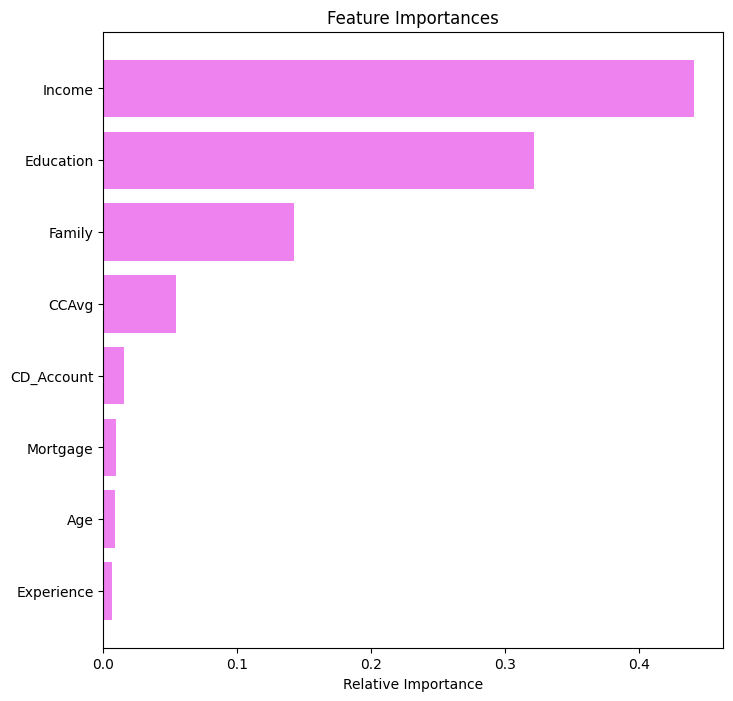

In [ ]:
# Get feature importance values from the trained Decision Tree model
importances = dt5.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)

# Set the figure size
plt.figure(figsize=(8, 8))

# Set the title of the plot
plt.title("Feature Importances")

# Create a horizontal bar chart showing feature importance
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

# Set y-axis labels using feature names
plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])

# Label the x-axis
plt.xlabel("Relative Importance")

# Display the plot
plt.show()

- Income and Education have the highest importance in deciding the splits.
- Family and CCAvg have moderate importance.
- Securities_Account has no importance and CD_Account, Mortgage, Age and Experience have little importance.

Conclusion


- Income and Education are the most influential factors in predicting loan acceptance.
- Family size and CCAvg (credit card spending average) have moderate importance.
Securities_Account has no importance, and CD_Account, Mortgage, Age, and Experience have minimal influence​.
- People with a family size of 3 or 4 are more likely to accept a personal loan, though those with a smaller family size (1-2) also show a good acceptance rate​
.
- Higher credit card average spending (CCAvg) correlates with a higher likelihood of accepting a loan​
.
- No significant difference in loan acceptance between customers who use a credit card from other banks and those who don’t​, and those who use online services and those who don't
.

Recommendations


- Target High-Income and Well-Educated Customers – Since income and education are strong indicators of loan acceptance, marketing efforts should focus on this demographic.

- Leverage Family Size Insights – Campaigns can highlight tailored loan benefits for families with 3 or 4 members, as they show a higher likelihood of acceptance.

- Enhance Credit Card Offers – Since higher CCAvg is linked to loan acceptance, bundling personal loans with attractive credit card perks may improve conversion rates.

- Improve Loan Offer Strategies – With 90% of customers rejecting loans, revising loan terms, interest rates, and promotional offers may enhance appeal.

- The company should also focus on those who hold a CD_Account since they have a good chance of accepting a personal loan.